<a href="https://colab.research.google.com/github/Akshay2224/King_County_Dataset/blob/master/King_county_dataset_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County -United States Of America

####King County is a county located in the U.S. state of Washington. The population was 2,233,163 in the 2018 census estimate. King is the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, which is the state's largest city.

####King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area. (The others are Snohomish County to the north, and Pierce County to the south.) About two-thirds of King County's population lives in Seattle's suburbs.


![alt text](https://www.racialequityalliance.org/wp-content/uploads/2016/10/assessors_social-1.jpg)
### Some Amazing Fact- King is the highest-income Washington location by per capita income ($38,211)



##Attributes Description
###The Attributes are as follows :

####1. id- Unique ID of Every Customer.
####2.date-Date At which house was sold.
####3.price-Price is prediction target.
####4.bedrooms-Number of Bedrooms/House.
####5.bathrooms-Number of bathrooms/House.
####6.sqft_living-square footage of the home.
####7.sqft_lot-square footage of the lot.
####8.floors-Total floors (levels) in house.
####9.waterfront-House which has a view to a waterfront. 
####10.View-How many times has been viewed
####11.condition-How good the condition is ( Overall ).
####12.gradeoverall- grade given to the housing unit, based on King County grading system.
####13.sqft_aboves-quare footage of house apart from basement.
####14.sqft_basement-square footage of the basement.
####15.yr_built-Built Year.
####16.yr_renovatedYear- when house was renovated.
####17.zipcode-zip.
####18.latLatitude- coordinate.
####19.longLongitude -coordinate.
####20.sqft_living15-Living room area in 2015(implies-> some renovations) This might or might not have affected the lotsize area.
####21.sqft_lot15-lotSize area in 2015(implies-> some renovations).



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv")

##Data Description

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

####There 19 house features plus the price and the id columns, along with 21613 observations.

Lets check the data that Is there any **null** value or not

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

So it is clear from the above analysis that there is **no null** value present

##Basic Statistics of Dataset:

In [6]:
df1=df.drop(["id","zipcode","lat","long"],axis=1)
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


##Univariate Analysis

####Let By using Univariate analysis describe ,summarizes the data and find the pattern in the data

####1.Price- Lets see how price is affected by the number of customer

In [7]:
df[["price"]].describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


Since the values in X axis were coming very big so we divided the actual price with 10000

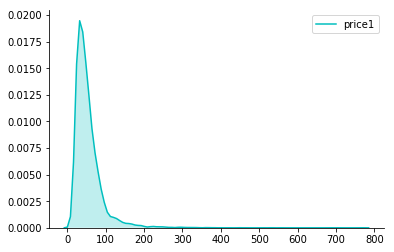

In [8]:

df['price1']=df['price']/10000
sns.kdeplot(df['price1'],shade=True,color='c')
sns.despine()


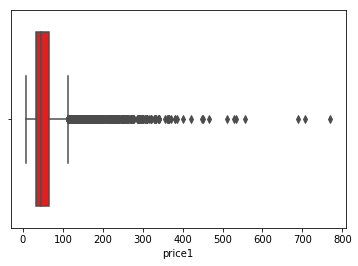

In [9]:

sns.boxplot(df['price1'],color='r')

####2. Bedrooms-It is also a key factor for a person before buying a house

In [10]:
df[['bedrooms']].describe()

,bedrooms
count,21613.000000
mean,3.370842
std,0.930062
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,33.000000


####Since the data shows that the there are maximum 33 bedrooms by person has taken which looks dubious so we will replace it by 3 as we think that it might be written mistakenly by the person.

In [11]:
df['bedrooms'].replace(33,3,inplace=True)
df[['bedrooms']].describe()

,bedrooms
count,21613.000000
mean,3.369454
std,0.907964
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,11.000000


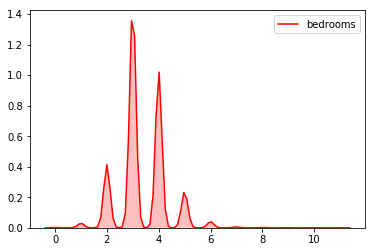

In [12]:
sns.kdeplot(df['bedrooms'],shade=True,color="r")


#####It is visible from the graph that maximum people are taking the rooms with bedroom between 1-5

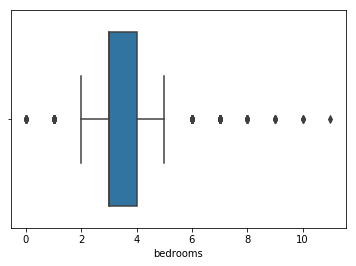

In [13]:
sns.boxplot(df['bedrooms'])

####3.Bathrooms-It is also a key factor for selecting a house



In [14]:
df[['bathrooms']].describe()

,bathrooms
count,21613.000000
mean,2.114757
std,0.770163
min,0.000000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


####Since It is seen from the data that bathrooms are in decimal which doesn't look possible but here is some interesting to know that In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower  and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". This lack of a single, universal definition commonly results in discrepancies between advertised and actual number of baths in real estate listings. An additional complication is that there are currently two ways of notating the number of bathrooms in a dwelling. One method is to count a half bathroom as ".5" and then add this to the number of full bathrooms (e.g., "2.5" baths would mean 2 full baths and 1 half bath). The other, newer method is to put the number of full bathrooms to the left side of the decimal point and to put the number of half bathrooms to the right of the decimal point (e.g., "2.1" would mean 2 full baths and 1 half bath; "3.2" would mean 3 full baths and 2 half baths). 

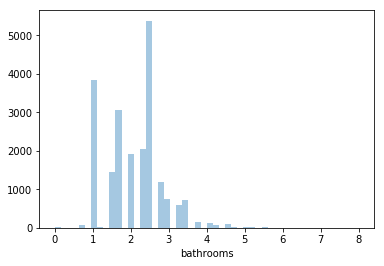

In [15]:
sns.distplot(df['bathrooms'],kde=False)

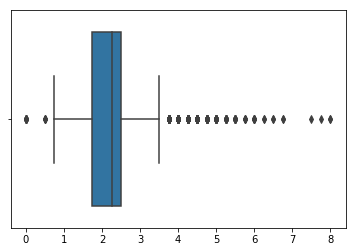

In [16]:
sns.boxplot(df[['bathrooms']])

####4.Square Feet Living(sqft_living)

In [17]:
df[['sqft_living']].describe()

,sqft_living
count,21613.000000
mean,2079.899736
std,918.440897
min,290.000000
25%,1427.000000
50%,1910.000000
75%,2550.000000
max,13540.000000


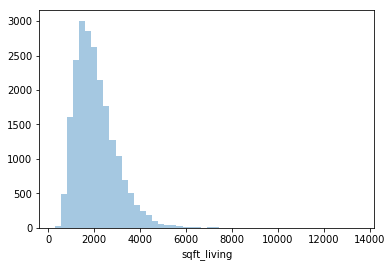

In [18]:
sns.distplot(df['sqft_living'],kde=False)

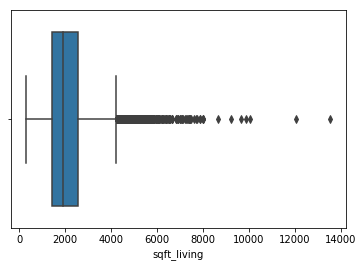

In [19]:
sns.boxplot(df['sqft_living'])

####5.Sqaure Feet footage for lot(sqft_lot)

In [20]:
df[['sqft_lot']].describe()

,sqft_lot
count,2.161300e+04
mean,1.510697e+04
std,4.142051e+04
min,5.200000e+02
25%,5.040000e+03
50%,7.618000e+03
75%,1.068800e+04
max,1.651359e+06


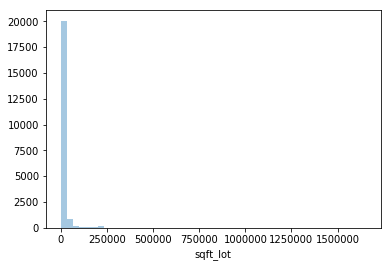

In [21]:
sns.distplot(df['sqft_lot'],kde=False)

####Since the value in the X axis are not visible so we will take the log of the values

In [0]:
df['sqft_lot1']=np.log(df['sqft_lot'])

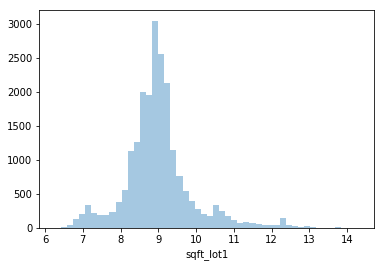

In [23]:
sns.distplot(df['sqft_lot1'],kde=False)

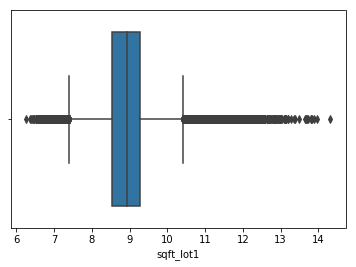

In [24]:
sns.boxplot(df['sqft_lot1'])

####6. Floors

In [25]:
df[['floors']].describe()

,floors
count,21613.000000
mean,1.494309
std,0.539989
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,3.500000


####Since it is visible that floors cannot be in float so it should be noted that here it is Floor area ratio .Floor area ratio(FAR) is the measurement of a building’s floor area in relation to the size of the lot/parcel that the building is located on.
####FAR is expressed as a decimal number, and is derived by dividing the total area of the building by the total area of the parcel (building area ÷ lot area). FAR is an effective way to calculate the bulk or mass of building volume on a development site, and is often used in conjunction with other development standards such as building heights, lot coverage and lot area to encourage a community’s desired arrangement and form of development. In this context, higher.

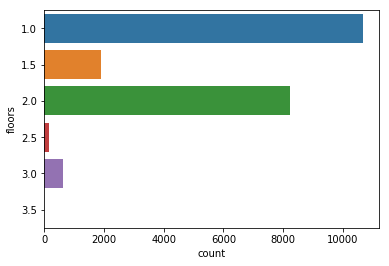

In [26]:
sns.countplot(y=df['floors'])

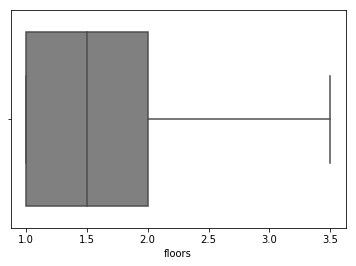

In [27]:
sns.boxplot(df['floors'],color='grey')

####7.Waterfront

In [28]:
df[['waterfront']].describe()

,waterfront
count,21613.000000
mean,0.007542
std,0.086517
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


So we have Counted that 21613 rooms with view toward waterfront

####8.Condition

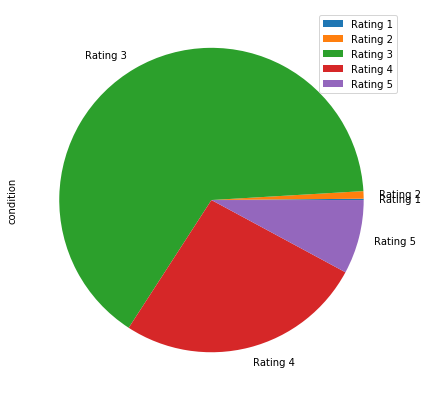

In [29]:
p2=df.query('condition==1').count()
p3=df.query('condition==2').count()
p4=df.query('condition==3').count()
p5=df.query('condition==4').count()
p6=df.query('condition==5').count()
df2=pd.DataFrame({'condition':[p2.id,p3.id,p4.id,p5.id,p6.id]},index=['Rating 1','Rating 2','Rating 3','Rating 4','Rating 5'])
plot = df2.plot.pie(y='condition', figsize=(7, 7))






####NOTE:Here Condition is described as rating between 1-5 . 

In [30]:
df['condition'].describe()

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

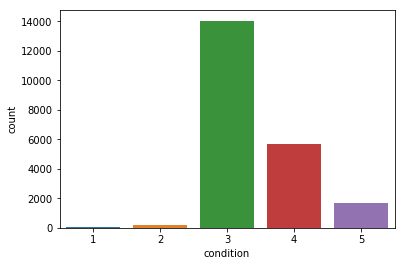

In [31]:
sns.countplot(df['condition'])

####9.View

In [32]:
df['view'].describe()

count    21613.000000
mean         0.234303
std          0.766318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

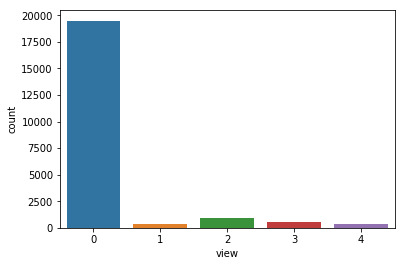

In [33]:
sns.countplot(df['view'])

####10.Grade

In [34]:
df[['grade']].describe()

,grade
count,21613.000000
mean,7.656873
std,1.175459
min,1.000000
25%,7.000000
50%,7.000000
75%,8.000000
max,13.000000


Here grading is done between 1-13

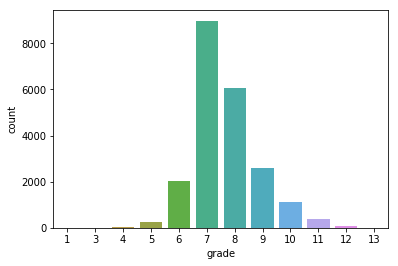

In [35]:
sns.countplot(df['grade'])

####11.sqft_above(Square Feet Above)

In [36]:
df[['sqft_above']].describe()

,sqft_above
count,21613.000000
mean,1788.390691
std,828.090978
min,290.000000
25%,1190.000000
50%,1560.000000
75%,2210.000000
max,9410.000000


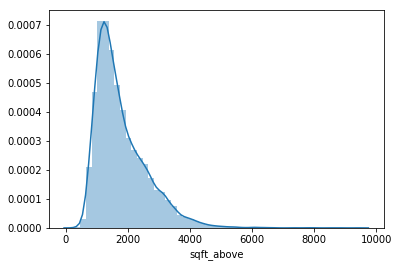

In [37]:
sns.distplot(df['sqft_above'])

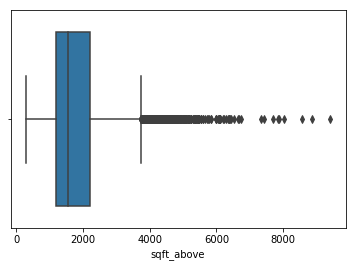

In [38]:
sns.boxplot(df['sqft_above'])

####12.Square Feet Basement(sqft_basement)

In [39]:
df[['sqft_basement']].describe()

,sqft_basement
count,21613.000000
mean,291.509045
std,442.575043
min,0.000000
25%,0.000000
50%,0.000000
75%,560.000000
max,4820.000000


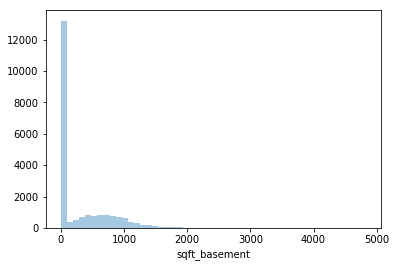

In [40]:
sns.distplot(df['sqft_basement'],kde=False)

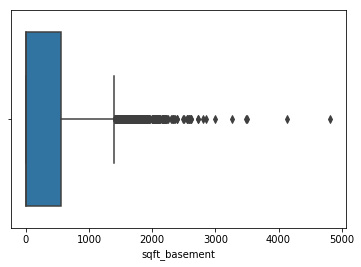

In [41]:
sns.boxplot(df['sqft_basement'])

####13.yr_built(Year built)

In [42]:
df[['yr_built']].describe()

,yr_built
count,21613.000000
mean,1971.005136
std,29.373411
min,1900.000000
25%,1951.000000
50%,1975.000000
75%,1997.000000
max,2015.000000


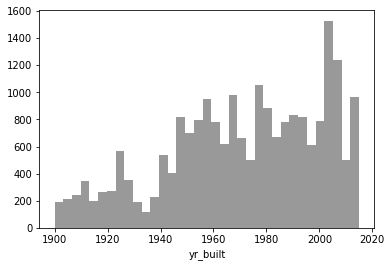

In [43]:
sns.distplot(df['yr_built'],kde=False,color='black')

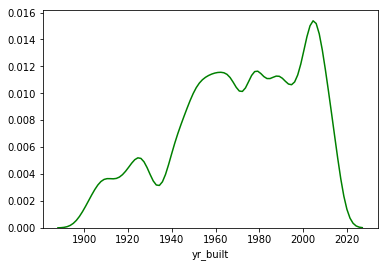

In [44]:
sns.distplot(df['yr_built'],hist=False,color='green')

####14.yr_renovated

In [45]:
df[['yr_renovated']].describe()

,yr_renovated
count,21613.000000
mean,84.402258
std,401.679240
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2015.000000


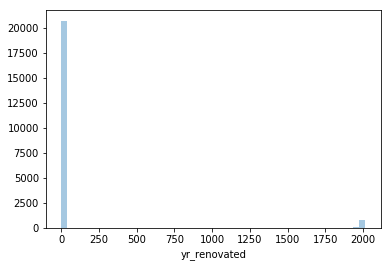

In [46]:
sns.distplot(df['yr_renovated'],kde=False)

#####This graph shows that many houses are not renovated once

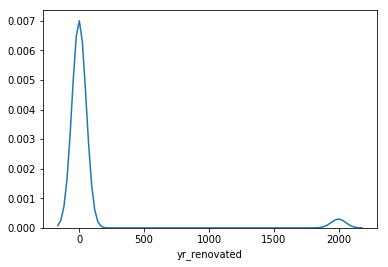

In [47]:
sns.distplot(df['yr_renovated'],hist=False)

####15.sqft_living15(sqft_living after renovation upto 2015)

In [48]:
df[['sqft_living15']].describe()

,sqft_living15
count,21613.000000
mean,1986.552492
std,685.391304
min,399.000000
25%,1490.000000
50%,1840.000000
75%,2360.000000
max,6210.000000


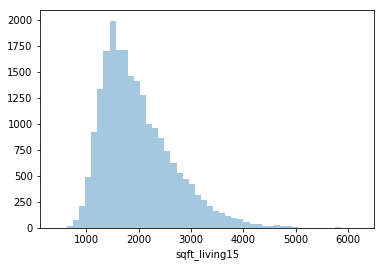

In [49]:
sns.distplot(df['sqft_living15'],kde=False)

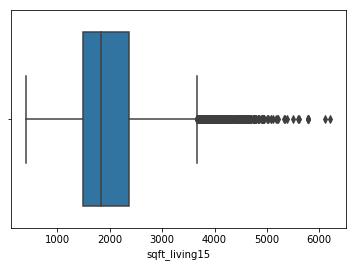

In [50]:
sns.boxplot(df['sqft_living15'])

####16.sqft_lot15


In [51]:
df[['sqft_lot15']].describe()

,sqft_lot15
count,21613.000000
mean,12768.455652
std,27304.179631
min,651.000000
25%,5100.000000
50%,7620.000000
75%,10083.000000
max,871200.000000


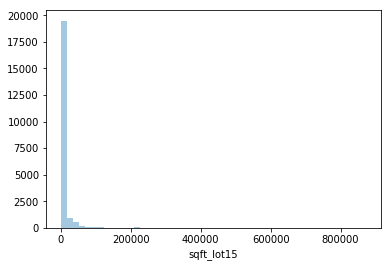

In [52]:
sns.distplot(df['sqft_lot15'],kde=False)

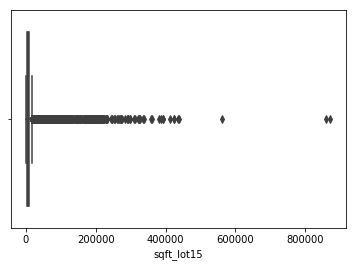

In [53]:
sns.boxplot(df['sqft_lot15'])

##Bivariate Analysis

In [54]:
p=df1.corr()
p

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


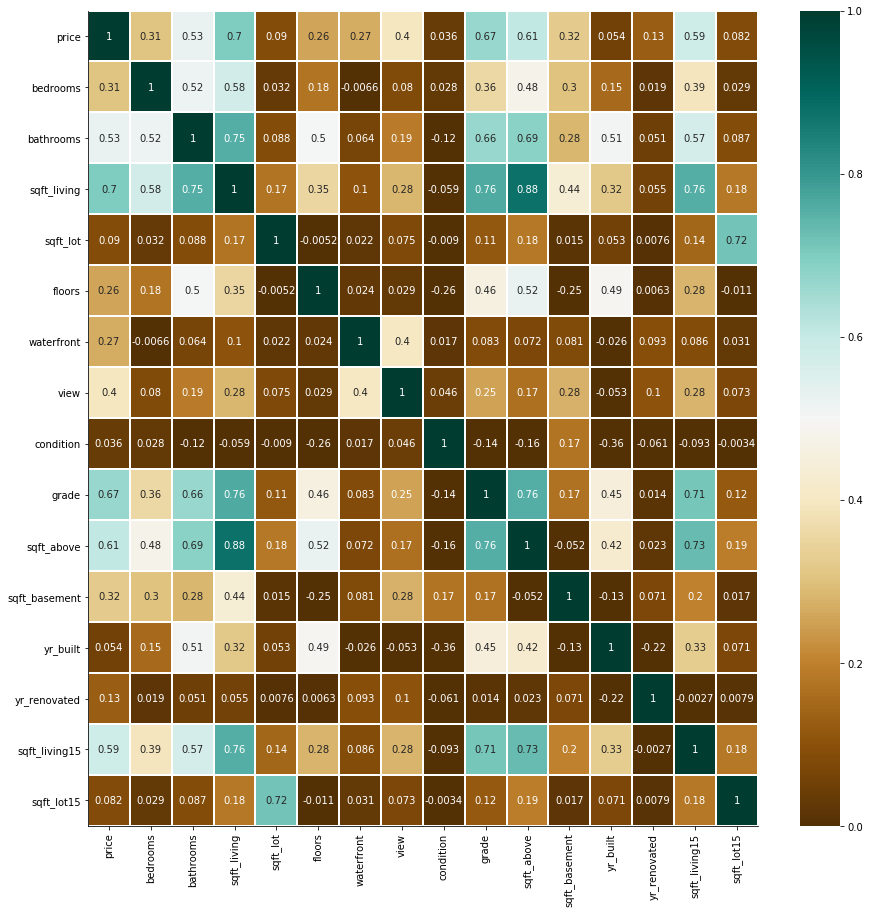

In [55]:
plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(), vmin=0, vmax=1,annot=True, cmap='BrBG', linewidth=1)
sns.despine()

###Here Are some variable between which we can do comaprisons
1.sqft_living and price

2.sqft_living and bathrooms

3.sqft_above and sqft_living

4.sqft_living and grade

5.price and grade

6.bathroom and grade.

####1.sqft_living and price

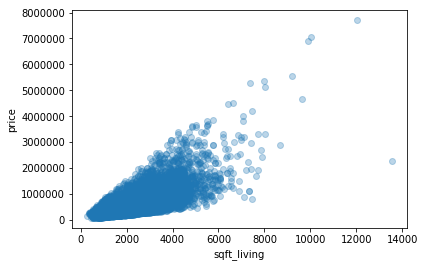

In [56]:
plt.scatter(df['sqft_living'],df['price'],alpha=0.3)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

It show linear relationship between sqft_living and price means if sqft_living increase then price also increase

####2.sqft_living and bathrooms

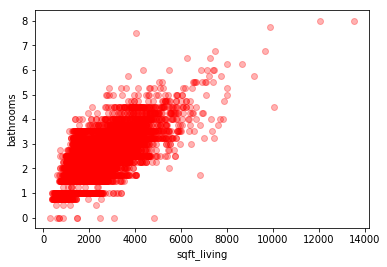

In [57]:
plt.scatter(df['sqft_living'],df['bathrooms'],alpha=0.3,color="red")
plt.xlabel('sqft_living')
plt.ylabel('bathrooms')
plt.show()

It show linear relationship between sqft_living and bathrooms means if sqft_living increase then bathrooms also increase

####3.sqft_living and sqft_above

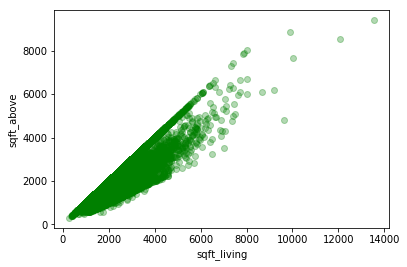

In [58]:
plt.scatter(df['sqft_living'],df['sqft_above'],alpha=0.3,color="green")
plt.xlabel('sqft_living')
plt.ylabel('sqft_above')
plt.show()

It show linear relationship between sqft_living and sqft_above means if sqft_living increase then sqft_above also increase

####4.sqft_living and grade

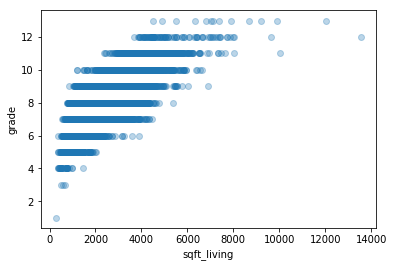

In [59]:
plt.scatter(df['sqft_living'],df['grade'],alpha=0.3)
plt.xlabel('sqft_living')
plt.ylabel('grade')
plt.show()

It show linear relationship between sqft_living and grade means if sqft_living increase then grade also increase

####5.grade and price

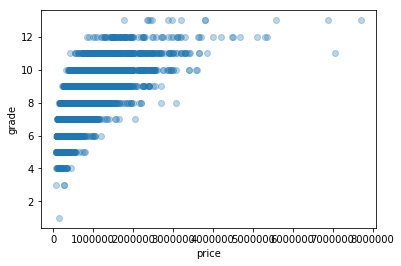

In [60]:
plt.scatter(df['price'],df['grade'],alpha=0.3)
plt.xlabel('price')
plt.ylabel('grade')
plt.show()

It show linear relationship between price and grade means if price increase then grade also increase

####6.Bathroom and grade

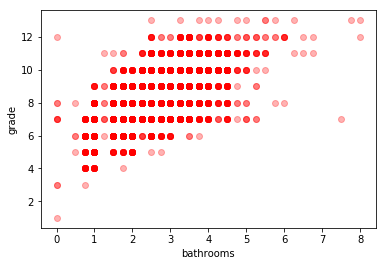

In [61]:
plt.scatter(df['bathrooms'],df['grade'],alpha=0.3,color='red')
plt.xlabel('bathrooms')
plt.ylabel('grade')
plt.show()

It show linear relationship between bathrooms and grade means if bathrooms increase then grade also increase

##Multivariate Analysis

####1.Bedroom, sqft_living and price

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


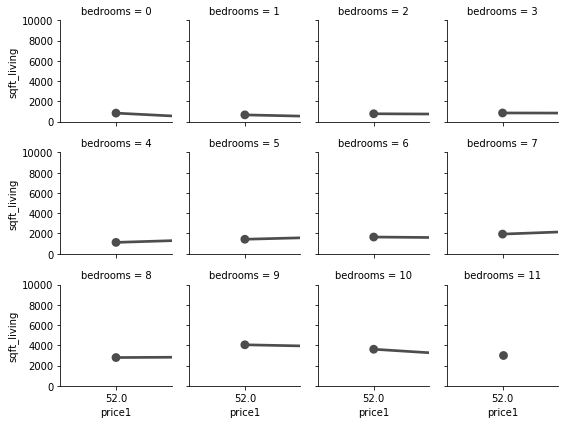

In [69]:
attend = df.query("bedrooms <= 11")
g = sns.FacetGrid(attend, col="bedrooms", col_wrap=4, height=2,ylim=(0,10000))
g.xlim=(0,1000)
g.map(sns.pointplot, "price1", "sqft_living", color=".3",ci=None)

###Conclusion
 So at last it can be concluded that almost every relationship is depending on sqft_living.So if the sqft_living is large then price,grade,bathrooms  are more.